Task1: Ascending the Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Making the Dataset

In [2]:
#making the dataset

np.random.seed(45)

num_samples = 40
    
# Generate data
x1_np_arr = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1_np_arr + 4
eps = np.random.randn(num_samples)
y_np_arr = f_x + eps

Q1. Use torch.autograd to find the true gradient on the full_batch loss function above dataset using linear regression 
(in the form theta_0 + x*theta_1) for any given values of (theta_0, theta_1)

In [6]:
# converting numpy arrays to torch tensors
x1= torch.tensor(x1_np_arr, dtype= torch.float32)
y= torch.tensor(y_np_arr, dtype= torch.float32)

max_epochs= 100
lr= 0.1                                         # learning rate

theta= torch.tensor([0,0], dtype= torch.float32, requires_grad= True)  #initializing theta

epoch= 0
while epoch < max_epochs:

    y_pred= theta[0] +x1*theta[1]                # prediction y_pred tensor

    loss= torch.mean((y_pred - y)**2)            # full_batch loss function

    loss.backward()                              # backpropagation

    grad_tensor= theta.grad                      # gradient tensor
    print(f"Grad of full_batch loss function at epoch {epoch}: {grad_tensor}")

    if epoch==0:                                  
        grad_tensor_epoch0= grad_tensor.clone()    # storing the gradient tensor at iter=0 for comparison

    theta_old= theta.clone()                    # deep copying the theta tensor
    theta= theta- lr*grad_tensor                # updating theta tensor

    # To break the connection between the new tensor and the old tensor
    theta= theta.detach().numpy()                 # converting theta tensor to numpy array
    theta= torch.tensor(theta, dtype= torch.float32, requires_grad= True)  # converting numpy array to torch tensor

    if torch.abs(theta- theta_old).sum() < 1e-3: # convergence condition
        break

    epoch += 1

Grad of full_batch loss function at epoch 0: tensor([-7.4471, -1.0253])
Grad of full_batch loss function at epoch 1: tensor([-5.9750, -1.0867])
Grad of full_batch loss function at epoch 2: tensor([-4.7984, -1.1192])
Grad of full_batch loss function at epoch 3: tensor([-3.8577, -1.1298])
Grad of full_batch loss function at epoch 4: tensor([-3.1053, -1.1238])
Grad of full_batch loss function at epoch 5: tensor([-2.5033, -1.1054])
Grad of full_batch loss function at epoch 6: tensor([-2.0213, -1.0780])
Grad of full_batch loss function at epoch 7: tensor([-1.6353, -1.0441])
Grad of full_batch loss function at epoch 8: tensor([-1.3259, -1.0059])
Grad of full_batch loss function at epoch 9: tensor([-1.0778, -0.9648])
Grad of full_batch loss function at epoch 10: tensor([-0.8786, -0.9221])
Grad of full_batch loss function at epoch 11: tensor([-0.7185, -0.8787])
Grad of full_batch loss function at epoch 12: tensor([-0.5897, -0.8354])
Grad of full_batch loss function at epoch 13: tensor([-0.4859

Q2. Using the same (theta_0, theta_1) as above, calculate the stochastic gradient for all points in the dataset. 
Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [7]:
num_samples= len(x1)

max_epochs= 10

lr= 0.1

epoch= 0
while epoch <max_epochs:

    sum_grad_tensor_SGD= torch.tensor([0,0], dtype= torch.float32)

    for i in range(num_samples):

        y_pred= theta[0] + x1[i]*theta[1]         # prediction y_pred tensor

        loss_SGD= (y_pred - y[i])**2                  # SGD loss function

        loss_SGD.backward()                           # backpropagation

        grad_tensor_SGD= theta.grad                   # SGD gradient tensor
        # print(f"Stochastic Gradient at epoch {epoch} and sample at idx {i}: {grad_tensor_SGD}")

        theta_old= theta.clone()                  # deep copying the theta tensor
        theta= theta- lr*grad_tensor_SGD              # updating theta tensor

        # To break the connection between the new tensor and the old tensor
        theta= theta.detach().numpy()             # converting theta tensor to numpy array
        theta= torch.tensor(theta, dtype= torch.float32, requires_grad= True)  # converting numpy array to torch tensor

        sum_grad_tensor_SGD += grad_tensor_SGD

    avg_grad_tensor_SGD= sum_grad_tensor_SGD/num_samples
    print(f"Average Stochastic Gradient at epoch {epoch}: {avg_grad_tensor_SGD}")

    if epoch==0:
        avg_grad_tensor_SGD_epoch0= avg_grad_tensor_SGD.clone()
    
    epoch +=1


# Showing the stochastic gradient is a good estimate of the true gradient
print("\n**Comparison of True Gradient and Average Stochastic Gradient at epoch 0**")
print(f"True Gradient: {grad_tensor_epoch0}")
print(f"Average Stochastic Gradient: {avg_grad_tensor_SGD_epoch0}")

# Problem: The average stochastic gradient is coming out to be very different from the true gradient.

Average Stochastic Gradient at epoch 0: tensor([-0.0958, -0.0147])
Average Stochastic Gradient at epoch 1: tensor([-0.0004, -0.0012])
Average Stochastic Gradient at epoch 2: tensor([-2.2423e-05, -7.4288e-05])
Average Stochastic Gradient at epoch 3: tensor([-1.5974e-06, -4.9368e-06])
Average Stochastic Gradient at epoch 4: tensor([ 0.0000e+00, -3.4645e-07])
Average Stochastic Gradient at epoch 5: tensor([ 3.6955e-07, -7.2271e-08])
Average Stochastic Gradient at epoch 6: tensor([ 3.6955e-07, -7.2271e-08])
Average Stochastic Gradient at epoch 7: tensor([ 3.6955e-07, -7.2271e-08])
Average Stochastic Gradient at epoch 8: tensor([ 3.6955e-07, -7.2271e-08])
Average Stochastic Gradient at epoch 9: tensor([ 3.6955e-07, -7.2271e-08])

**Comparison of True Gradient and Average Stochastic Gradient at epoch 0**
True Gradient: tensor([-7.4471, -1.0253])
Average Stochastic Gradient: tensor([-0.0958, -0.0147])


Q3. Implement full-batch, mini-batch and stochastic gradient descent. 
Calculate the average number of iterations required for each method to get sufficiently close
to the optimal solution, where "sufficiently close" means within a distance of eps-neighborhood 
from the minimum value of the loss function. Visualize the convergence process for 15 epochs. 
Choose for convergence criteria. Which optimization process takes a larger number of epochs to converge,
and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation 
of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

In [78]:
# STOCHASTIC GRADIENT DESCENT (SGD) IMPLEMENTATION

class Stochastic_Gradient_Descent_model:
    """
    Class to implement Stochastic Gradient Descent on linear regression problem
    Inputs: n_batches, lr, max_epochs, epsilon, x1, y
    Outputs: None
    Attributes: theta_optimal, loss_arr, theta_arr, theta_guess
    """

    def __init__(self, n_batches, lr=0.01, max_epochs= 1000, epsilon= 0.001):
        self.n_batches= n_batches
        self.lr= lr
        self.max_epochs= max_epochs
        self.epsilon= epsilon

        self.theta= torch.tensor([0,0], dtype= torch.float32, requires_grad= True)

        np.random.seed(45)
    
    def fit(self, x1_np_arr, y_np_arr):
        """ 
        Function to fit the model using Stochastic Gradient Descent
        Inputs: x1, y (numpy arrays)
        Outputs: None
        """
        self.x1= x1_np_arr
        self.y= y_np_arr

        # converting the numpy arrays to torch tensors
        # x1= torch.tensor(x1, dtype= torch.float32)          # already done in above cell
        # y= torch.tensor(y, dtype= torch.float32)

        # convergence criteria
        epsilon= 0.001
        num_samples= len(self.x1)

        loss_old= np.inf
        self.loss_list_per_epoch= []                                               # list to store the loss function values

        # Full Batch Gradient Descent                              # Possible Cases
        # n_batches= 1

        # Mini Batch Gradient Descent
        # n_batches= 5

        # Stochastic Gradient Descent
        # n_batches= num_samples

        n_batches= self.n_batches

        # max number of epochs
        max_epochs= 1000

        batch_size= int(num_samples/n_batches)

        # initial guess of theta
        theta_guess= [0,0]
        self.theta_guess= theta_guess
        theta= torch.tensor(theta_guess, dtype= torch.float32, requires_grad= True)

        # theta tensor stored in a list
        self.theta_list_per_epoch= []                                               # list to store the theta values

        # learning rate
        lr= 0.01

        epoch= 0
        while epoch <= max_epochs:
            # shuffle the data
            idx= np.random.permutation(num_samples)

            X_np_shuffled= x1_np_arr[idx]
            Y_np_shuffled= y_np_arr[idx]

            X_shuffled= torch.tensor(X_np_shuffled, dtype= torch.float32)
            Y_shuffled= torch.tensor(Y_np_shuffled, dtype= torch.float32)

            flag_get_out = False

            for iter in range(n_batches):
                X_np_batch= X_np_shuffled[batch_size*iter: batch_size*(iter+1)]
                Y_np_batch= Y_np_shuffled[batch_size*iter: batch_size*(iter+1)]

                X_batch= torch.tensor(X_np_batch, dtype= torch.float32)
                Y_batch= torch.tensor(Y_np_batch, dtype= torch.float32)

                Y_pred= theta[0] +X_batch*theta[1]           # prediction 

                loss= torch.mean((Y_pred - Y_batch)**2)      # loss function

                loss.backward()                              # backpropagation

                grad_tensor= theta.grad                      # gradient tensor
                # print(f"Grad of loss function at epoch {epoch} iter {iter}: {grad_tensor}")

                theta= theta- lr*grad_tensor                 # updating theta tensor

                # To break the connection between the new tensor and the old tensor
                theta= theta.detach().numpy()                 # converting theta tensor to numpy array
                theta= torch.tensor(theta, dtype= torch.float32, requires_grad= True)  # converting numpy array to torch tensor

                # print(f"epoch {epoch} iter {iter}: theta {theta} loss {loss}")
                
                if abs(loss_old- loss) < epsilon: # convergence condition
                        flag_get_out= True
                        break
                    
                loss_old= loss

            if epoch <= 15:
                self.loss_list_per_epoch.append(loss.item())
            
            self.theta_list_per_epoch.append(theta)
            
            if flag_get_out:
                break

            epoch += 1


        self.theta_optimal= theta
        
        print("\n**Optimisation Complete**")
        print(f"Loss Function is optimised at epoch: {epoch}")
        print(f"Optimal theta: {theta} loss: {loss}")


**Optimisation Complete**
Loss Function is optimised at epoch: 296
Optimal theta: tensor([3.8808, 2.1785], requires_grad=True) loss: 0.6758800148963928

**Optimisation Complete**
Loss Function is optimised at epoch: 101
Optimal theta: tensor([3.9205, 2.5455], requires_grad=True) loss: 0.28661757707595825

**Optimisation Complete**
Loss Function is optimised at epoch: 3
Optimal theta: tensor([3.5886, 1.4474], requires_grad=True) loss: 0.001366332871839404


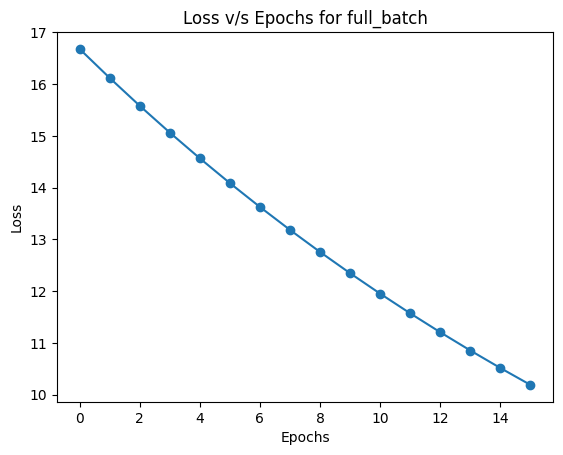

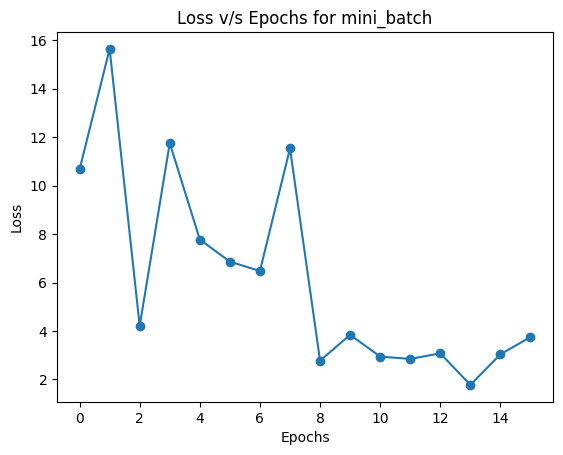

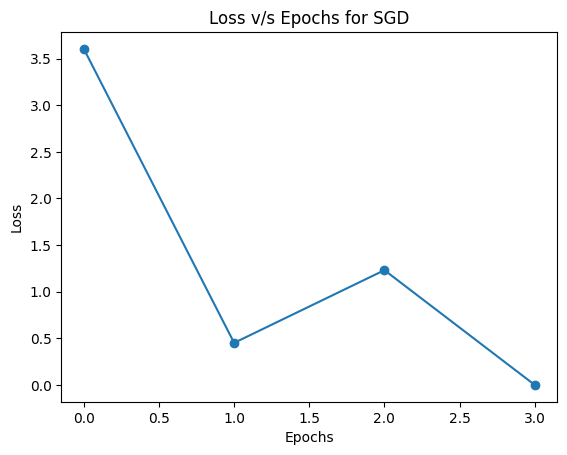

In [79]:
# Plotting Loss v/s epochs for all full_batch SGD

model_dict= {"full_batch": 1, "mini_batch": 5, "SGD": len(x1_np_arr)}

for i in model_dict:
    n_batches= model_dict[i]
    model= Stochastic_Gradient_Descent_model(n_batches= n_batches)
    model.fit(x1_np_arr, y_np_arr)

    plt.figure()
    plt.plot(model.loss_list_per_epoch, '-o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss v/s Epochs for {i}')

In [77]:
# Which optimisation process takes larger number of epochs to converge, and why?

print("SGD without momentum implementation")
print(f"epochs for full_batch: 296")
print(f"epochs for mini_batch: 101")
print(f"epochs for simple SGD: 3")

# problem: what is the reason behind full_batch taking the largest number of epochs to converge?
# full-batch takes the largest number of epochs to converge because it computes the gradient using all the samples in the dataset. The gradient is more accurate but it is computationally expensive.

SGD without momentum implementation
epochs for full_batch: 296
epochs for mini_batch: 101
epochs for simple SGD: 3



**Optimisation Complete**
Loss Function is optimised at epoch: 296
Optimal theta: tensor([3.8808, 2.1785], requires_grad=True) loss: 0.6758800148963928

**Optimisation Complete**
Loss Function is optimised at epoch: 101
Optimal theta: tensor([3.9205, 2.5455], requires_grad=True) loss: 0.28661757707595825

**Optimisation Complete**
Loss Function is optimised at epoch: 3
Optimal theta: tensor([3.5886, 1.4474], requires_grad=True) loss: 0.001366332871839404


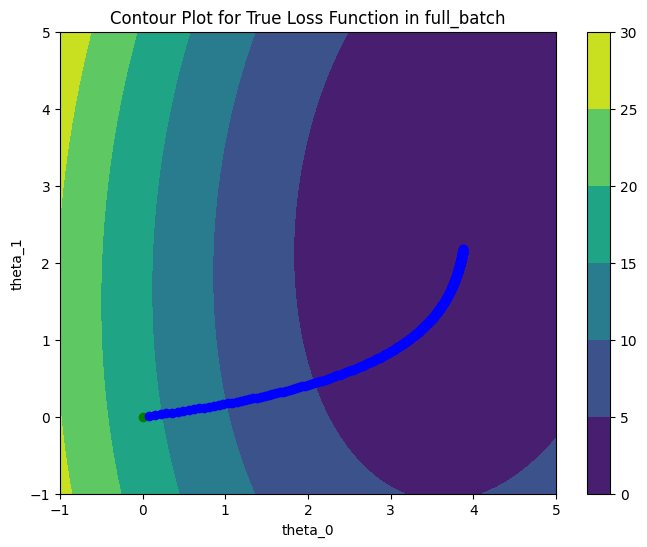

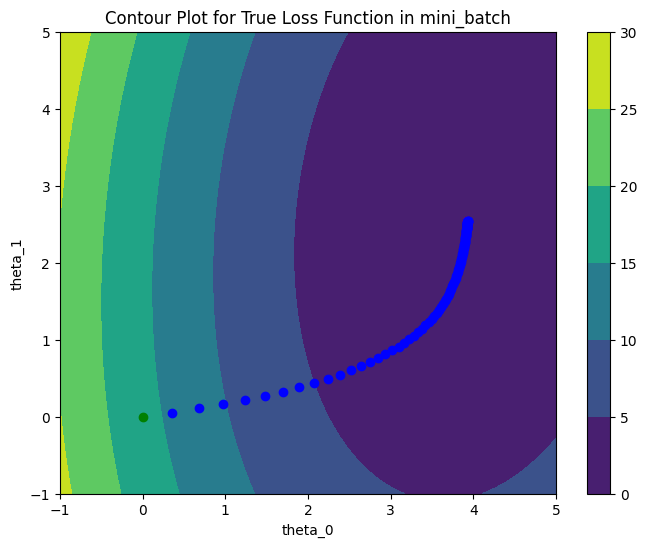

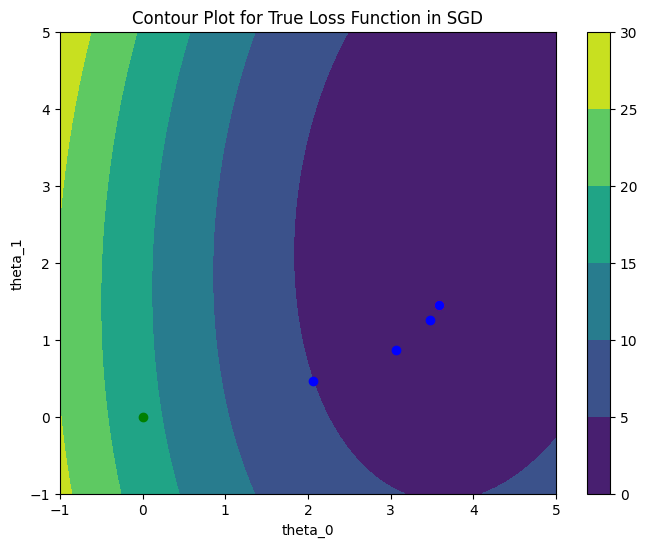

In [80]:
# Show the Contour Plots for the True Loss function with the path taken by the theta values during the optimisation

theta_0= np.linspace(-1, 5, 100)
theta_1= np.linspace(-1, 5, 100)

theta_0, theta_1= np.meshgrid(theta_0, theta_1)

loss= np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        y_pred= theta_0[i][j] + theta_1[i][j]*x1_np_arr
        loss[i][j]= np.mean((y_pred - y_np_arr)**2)


model_dict= {"full_batch": 1, "mini_batch": 5, "SGD": num_samples}

for row in range(3):
    plt.figure(figsize= (8,6))

    plt.contourf(theta_0, theta_1, loss, 5)                                                  # contour plot
    plt.colorbar()

    model_name= list(model_dict.keys())[row]
    model= Stochastic_Gradient_Descent_model(n_batches= model_dict[model_name])
    model.fit(x1_np_arr, y_np_arr)

    plt.scatter(model.theta_guess[0], model.theta_guess[1],  color= 'green', marker='o')     # initial theta

    theta_list= model.theta_list_per_epoch
    for i in range(len(theta_list)): 
        theta_i= theta_list[i].detach().numpy()   
        plt.plot(theta_i[0], theta_i[1], 'bo-')                                              # theta

    theta_final= theta_list[-1].detach().numpy()
    plt.scatter(theta_final[0], theta_final[1],  color='red', marker= 'o')                   # final theta

    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title(f'Contour Plot for True Loss Function in {model_name}')

Q4. Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

In [86]:
# STOCHASTIC GRADIENT DESCENT (SGD) w/ Momentum IMPLEMENTATION

class Stochastic_Gradient_Descent_momentum_model:
    """
    Class to implement Stochastic Gradient Descent w/ momentum on linear regression problem
    Inputs: n_batches, lr, max_epochs, epsilon, momentum, x1, y
    Outputs: None
    Attributes: theta_optimal, loss_arr, theta_arr, theta_guess
    """

    def __init__(self, n_batches, lr=0.01, max_epochs= 1000, epsilon= 0.001, momentum= 0.1):
        self.n_batches= n_batches
        self.lr= lr
        self.max_epochs= max_epochs
        self.epsilon= epsilon
        self.momentum= momentum

        self.theta= torch.tensor([0,0], dtype= torch.float32, requires_grad= True)

        np.random.seed(45)
    
    def fit(self, x1_np_arr, y_np_arr):
        """ 
        Function to fit the model using Stochastic Gradient Descent
        Inputs: x1, y (numpy arrays)
        Outputs: None
        """
        self.x1= x1_np_arr
        self.y= y_np_arr

        # converting the numpy arrays to torch tensors
        # x1= torch.tensor(x1, dtype= torch.float32)          # already done in above cell
        # y= torch.tensor(y, dtype= torch.float32)

        # convergence criteria
        epsilon= 0.001
        num_samples= len(self.x1)
        momentum= self.momentum

        loss_old= np.inf
        self.loss_list_per_epoch= []                                               # list to store the loss function values

        # Full Batch Gradient Descent                              # Possible Cases
        # n_batches= 1

        # Mini Batch Gradient Descent
        # n_batches= 5

        # Stochastic Gradient Descent
        # n_batches= num_samples

        n_batches= self.n_batches

        # max number of epochs
        max_epochs= 1000

        batch_size= int(num_samples/n_batches)

        # initial guess of theta
        theta_guess= [0,0]
        self.theta_guess= theta_guess
        theta= torch.tensor(theta_guess, dtype= torch.float32, requires_grad= True)

        # theta tensor stored in a list
        self.theta_list_per_epoch= []                                # list to store the theta values for every epoch
        self.theta_list_per_iter= []                                 # list to store the theta values for every iteration
        
        # momentum stored in a list
        self.momentum_list_per_epoch= []
        # grad tensor stored in a list
        self.gradient_list_per_epoch= []

        # learning rate
        lr= 0.01

        # change in theta tensor with every iteration
        change_theta= torch.tensor([0,0], dtype= torch.float32, requires_grad= True)

        epoch= 0
        while epoch <= max_epochs:
            # shuffle the data
            idx= np.random.permutation(num_samples)

            X_np_shuffled= x1_np_arr[idx]
            Y_np_shuffled= y_np_arr[idx]

            X_shuffled= torch.tensor(X_np_shuffled, dtype= torch.float32)
            Y_shuffled= torch.tensor(Y_np_shuffled, dtype= torch.float32)

            flag_get_out = False

            for iter in range(n_batches):
                X_np_batch= X_np_shuffled[batch_size*iter: batch_size*(iter+1)]
                Y_np_batch= Y_np_shuffled[batch_size*iter: batch_size*(iter+1)]

                X_batch= torch.tensor(X_np_batch, dtype= torch.float32)
                Y_batch= torch.tensor(Y_np_batch, dtype= torch.float32)

                Y_pred= theta[0] +X_batch*theta[1]           # prediction 

                loss= torch.mean((Y_pred - Y_batch)**2)      # loss function

                loss.backward()                              # backpropagation

                grad_tensor= theta.grad                      # gradient tensor
                # print(f"Grad of loss function at epoch {epoch} iter {iter}: {grad_tensor}")

                change_theta= lr*grad_tensor + momentum*change_theta
                theta= theta- change_theta                # updating theta tensor

                self.theta_list_per_iter.append(theta)

                # To break the connection between the new tensor and the old tensor
                theta= theta.detach().numpy()                 # converting theta tensor to numpy array
                theta= torch.tensor(theta, dtype= torch.float32, requires_grad= True)  # converting numpy array to torch tensor

                # print(f"epoch {epoch} iter {iter}: theta {theta} loss: {loss}")
                
                if abs(loss_old- loss) < epsilon: # convergence condition
                        flag_get_out= True
                        break
                    
                loss_old= loss

            if epoch <= 15:
                self.loss_list_per_epoch.append(loss.item())
            
            self.theta_list_per_epoch.append(theta)
            self.gradient_list_per_epoch.append(grad_tensor)
            self.momentum_list_per_epoch.append(momentum*change_theta)
            
            if flag_get_out:
                break

            epoch += 1


        self.theta_optimal= theta
        
        print("\n**Optimisation Complete**")
        print(f"Loss Function is optimised at epoch: {epoch}")
        print(f"Optimal theta: {theta} loss: {loss}")


**Optimisation Complete**
Loss Function is optimised at epoch: 61
Optimal theta: tensor([4.0102, 2.8307], requires_grad=True) loss: 0.6042917966842651

**Optimisation Complete**
Loss Function is optimised at epoch: 86
Optimal theta: tensor([3.9862, 2.6646], requires_grad=True) loss: 0.5482704639434814

**Optimisation Complete**
Loss Function is optimised at epoch: 9
Optimal theta: tensor([4.1608, 2.6356], requires_grad=True) loss: 0.00033676205202937126


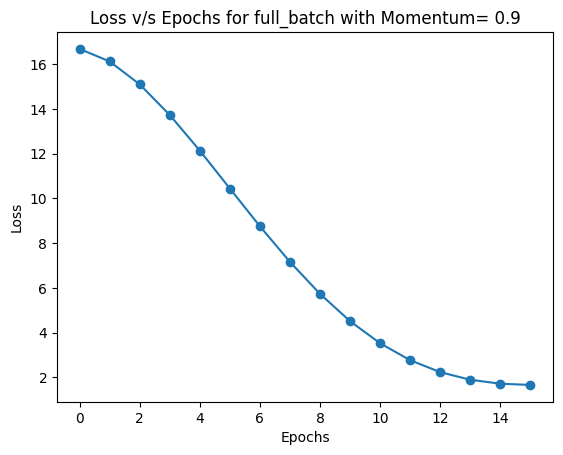

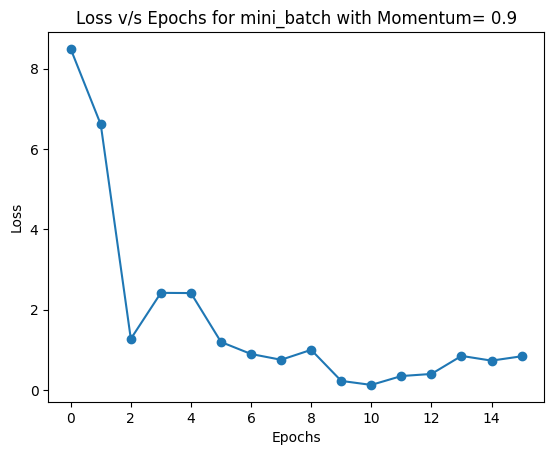

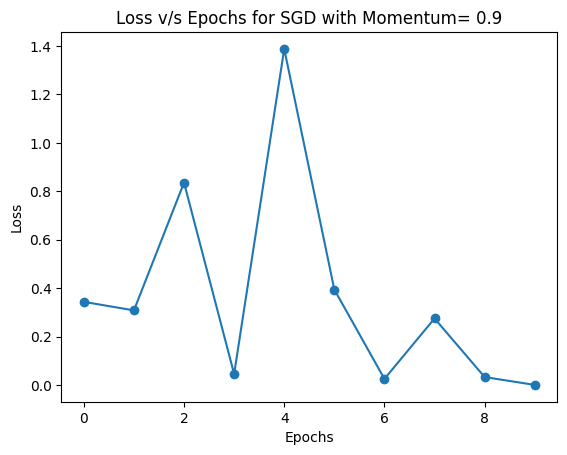

In [82]:
# Plotting Loss v/s epochs for all full_batch SGD w/ momentum

model_dict= {"full_batch": 1, "mini_batch": 5, "SGD": len(x1_np_arr)}

for i in model_dict:
    momentum= 0.9
    n_batches= model_dict[i]

    model= Stochastic_Gradient_Descent_momentum_model(n_batches= n_batches, momentum=momentum)
    model.fit(x1_np_arr, y_np_arr)

    plt.figure()
    plt.plot(model.loss_list_per_epoch, '-o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss v/s Epochs for {i} with Momentum= {momentum}')

In [25]:
# Compare the average number of steps for optimal theta convergence.

print("SGD with Momentum= 0.9 implementation")
print(f"epochs for full_batch: 61")
print(f"epochs for mini_batch: 86")
print(f"epochs for simple SGD: 9")


print("SGD without Momentum implementation")
print(f"epochs for full_batch: 296")
print(f"epochs for mini_batch: 45")
print(f"epochs for SGD: 14")

SGD with Momentum implementation
epochs for full_batch: 274
epochs for mini_batch: 285
epochs for simple SGD: 31



**Optimisation Complete**
Loss Function is optimised at epoch: 61
Optimal theta: tensor([4.0102, 2.8307], requires_grad=True) loss: 0.6042917966842651

**Optimisation Complete**
Loss Function is optimised at epoch: 86
Optimal theta: tensor([3.9862, 2.6646], requires_grad=True) loss: 0.5482704639434814

**Optimisation Complete**
Loss Function is optimised at epoch: 9
Optimal theta: tensor([4.1608, 2.6356], requires_grad=True) loss: 0.00033676205202937126


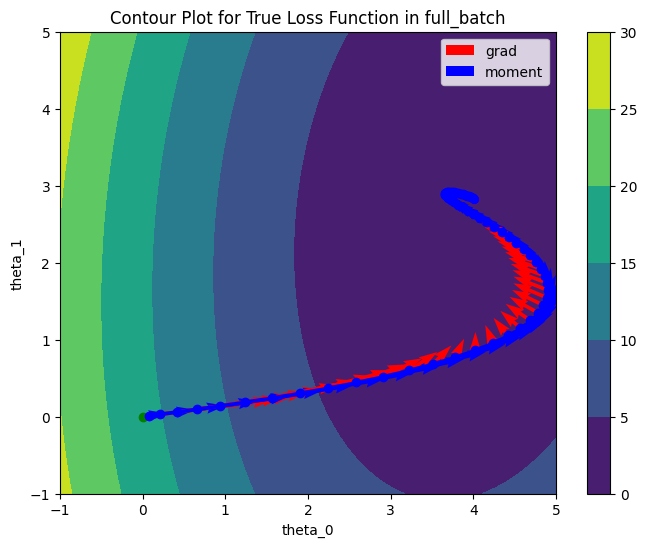

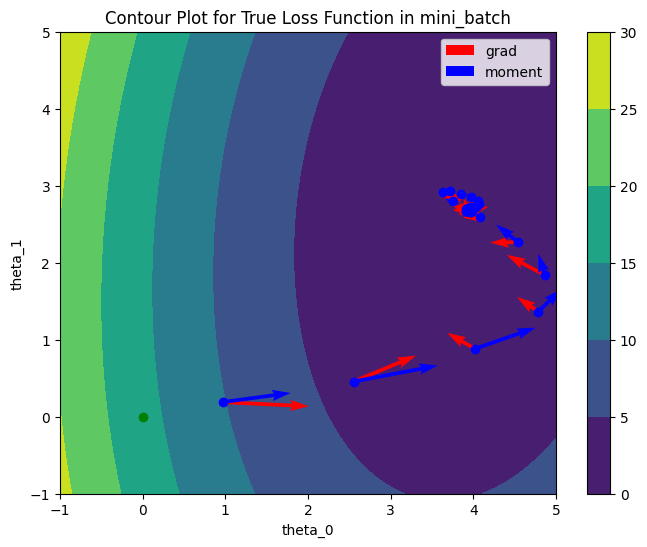

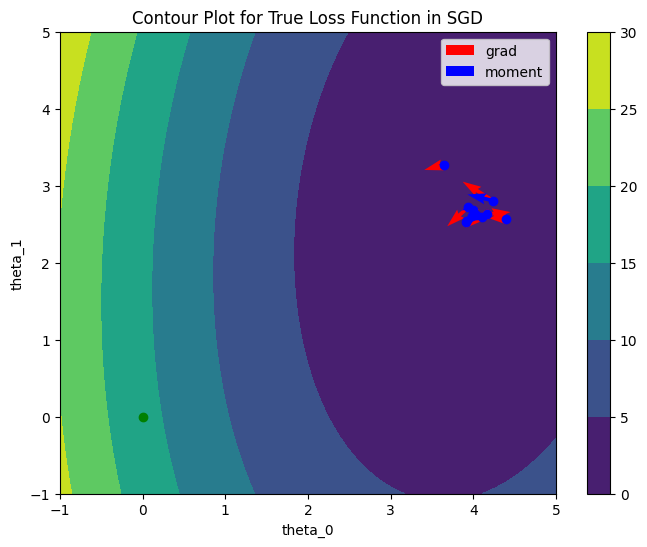

In [95]:
# Show the contour plot of loss function for momentum inspection
# Also show the gradient, momentum, theta vectors
# 

momentum= 0.9

theta_0= np.linspace(-1, 5, 100)
theta_1= np.linspace(-1, 5, 100)

theta_0, theta_1= np.meshgrid(theta_0, theta_1)

loss= np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        y_pred= theta_0[i][j] + theta_1[i][j]*x1_np_arr
        loss[i][j]= np.mean((y_pred - y_np_arr)**2)


model_dict= {"full_batch": 1, "mini_batch": 5, "SGD": num_samples}

for row in range(3):
    plt.figure(figsize= (8,6))

    plt.contourf(theta_0, theta_1, loss, 5)                                                  # contour plot
    plt.colorbar()

    model_name= list(model_dict.keys())[row]
    model= Stochastic_Gradient_Descent_momentum_model(n_batches= model_dict[model_name], momentum= momentum)
    model.fit(x1_np_arr, y_np_arr)

    plt.scatter(model.theta_guess[0], model.theta_guess[1],  color= 'green', marker='o')     # initial theta

    theta_list= model.theta_list_per_epoch
    gradient_list= model.gradient_list_per_epoch
    momentum_list= model.momentum_list_per_epoch
    for i in range(len(theta_list)): 
        theta_i= theta_list[i].detach().numpy()   
        gradient_i= -gradient_list[i].detach().numpy()
        momentum_i= -momentum_list[i].detach().numpy()

        plt.plot(theta_i[0], theta_i[1], 'bo-')                                              # theta
        plt.quiver(*theta_i, *gradient_i, angles='xy', scale_units='xy', scale=5, color= 'red')            # gradient vector at that theta_i
        plt.quiver(*theta_i, *momentum_i, angles='xy', scale_units='xy', scale=0.3, color='blue')            # momentum*change_x vector at that theta_i

    theta_final= theta_list[-1].detach().numpy()
    plt.scatter(theta_final[0], theta_final[1],  color='red', marker= 'o')                   # final theta
    plt.quiver(*theta_final, *gradient_i, angles='xy', scale_units='xy', scale=5, color= 'red', label='grad')
    plt.quiver(*theta_final, *momentum_i, angles='xy', scale_units='xy', scale=0.3, color='blue', label='moment')

    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.legend()
    plt.title(f'Contour Plot for True Loss Function in {model_name}')